In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'Haircuts/train'
data_test_path = 'Haircuts/test'
data_val_path = 'Haircuts/validation'

In [3]:
img_width = 180
img_height = 180

In [81]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 1371 files belonging to 15 classes.


In [82]:
data_cat = data_train.class_names

In [83]:
data_cat

['Burst Fade',
 'Buzz Cut',
 'Caesar Cut',
 'Comb Over',
 'Drop Fade',
 'French Crop',
 'High Fade',
 'Ivy League',
 'Low Fade',
 'Mid Fade',
 'Mid Part',
 'Modern Mullet',
 'Quiff',
 'Side Part',
 'Taper Fade']

In [100]:
# validation data
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 178 files belonging to 15 classes.


In [101]:
# testing data
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 162 files belonging to 15 classes.


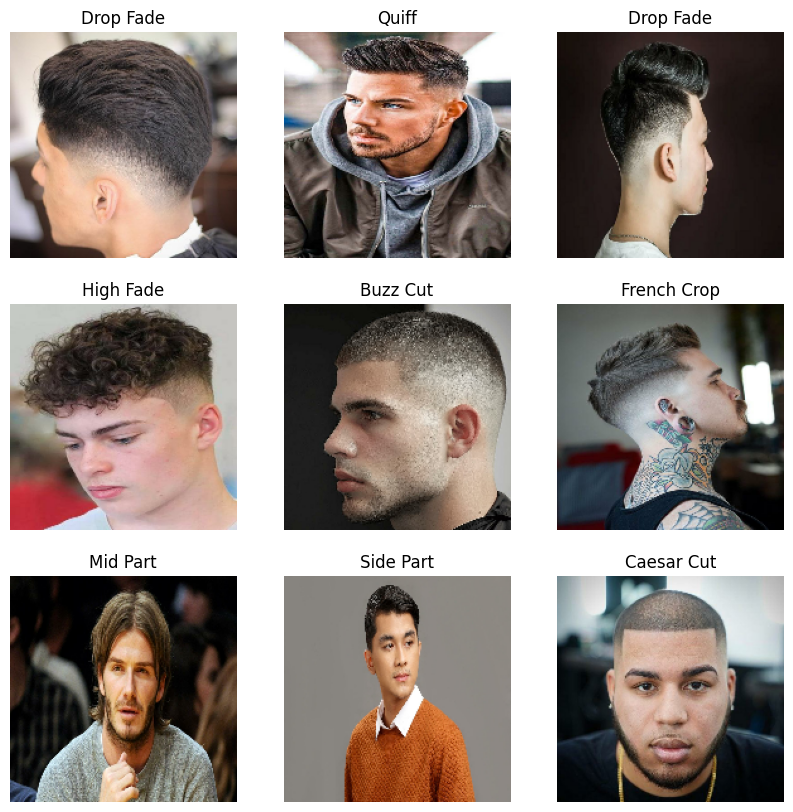

In [102]:
plt.figure(figsize=(10,10))
for image, labels, in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [103]:
from tensorflow.keras.models import Sequential

In [104]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [105]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [106]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [107]:
epochs_size = 25

In [108]:
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.0818 - loss: 3.2846 - val_accuracy: 0.0899 - val_loss: 2.6800
Epoch 2/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.1526 - loss: 2.6113 - val_accuracy: 0.3034 - val_loss: 2.2521
Epoch 3/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.3758 - loss: 2.0163 - val_accuracy: 0.5393 - val_loss: 1.6680
Epoch 4/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.6300 - loss: 1.2700 - val_accuracy: 0.6910 - val_loss: 1.2424
Epoch 5/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.8224 - loss: 0.6960 - val_accuracy: 0.8146 - val_loss: 0.9518
Epoch 6/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9008 - loss: 0.3896 - val_accuracy: 0.8371 - val_loss: 0.9172
Epoch 7/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.9478 - loss: 0.2626 - val_accuracy: 0.8427 - val_loss: 1.2040
Epoch 8/25
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.9520 - loss: 0.2710 - val_accuracy: 0.

Text(0.5, 1.0, 'Loss')

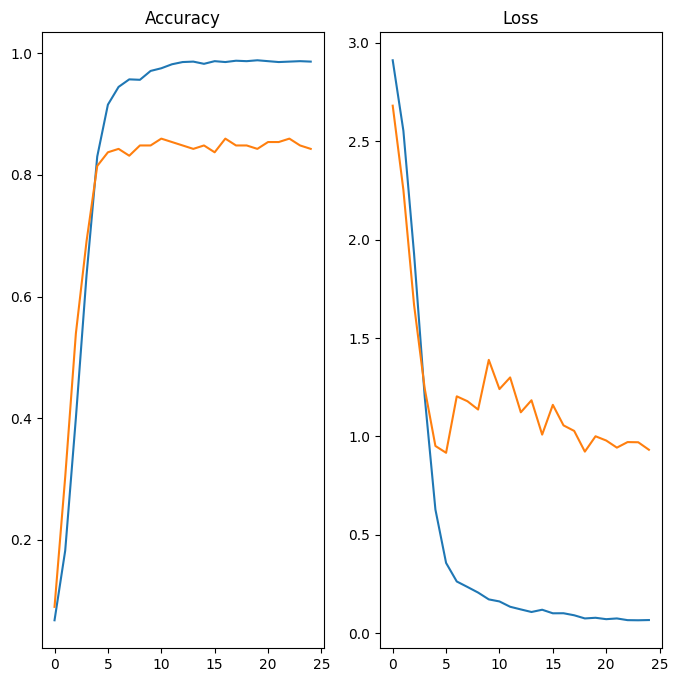

In [109]:
epoches_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epoches_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epoches_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epoches_range, history.history['loss'], label='Training Loss')
plt.plot(epoches_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')

In [110]:
image = 'cut.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [111]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [112]:
score = tf.nn.softmax(predict)

In [113]:
print('Haircut in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Haircut in image is Mid Fade with accuracy of 76.38


In [114]:
model.save('Image_haircut_classify.keras')